# quant-econ Solutions: Infinite Horizon Dynamic Programming

Solutions for http://quant-econ.net/jl/dp_intro.html

In [1]:
using QuantEcon
include("optgrowth.jl")
using PyPlot

## Exercise 1

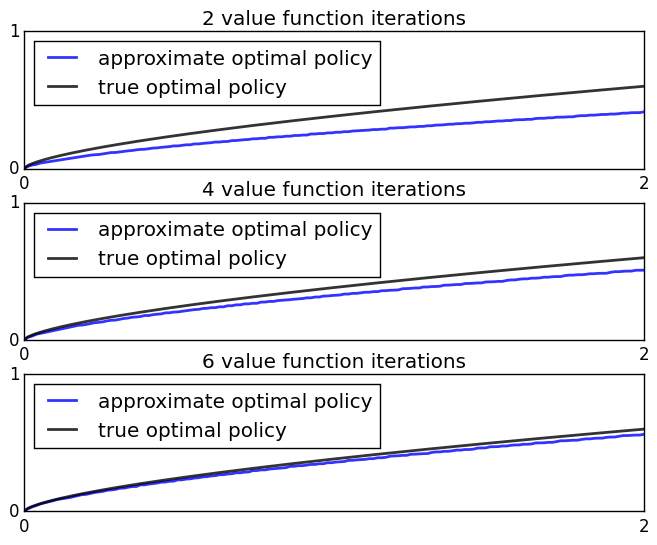

In [3]:
alpha, bet = 0.65, 0.95
gm = GrowthModel() 
true_sigma = (1 - alpha*bet) .* collect(gm.grid).^alpha
w = 5 .* gm.u(collect(gm.grid)) .- 25  # Initial condition

fig, ax = subplots(3, 1)

bellman(w) = bellman_operator(gm, w)

for (i, n) in enumerate((2, 4, 6))
    ax[i][:set_ylim](0, 1)
    ax[i][:set_xlim](0, 2)
    ax[i][:set_yticks]((0, 1))
    ax[i][:set_xticks]((0, 2))

    v_star = compute_fixed_point(bellman, w, max_iter=n, verbose=false)
    sigma = get_greedy(gm, v_star)

    ax[i][:plot](gm.grid, sigma, "b-", lw=2, alpha=0.8, label="approximate optimal policy")
    ax[i][:plot](gm.grid, true_sigma, "k-", lw=2, alpha=0.8, label="true optimal policy")
    ax[i][:legend](loc="upper left")
    ax[i][:set_title]("$n value function iterations")
end

fig[:show]()

## Exercise 2

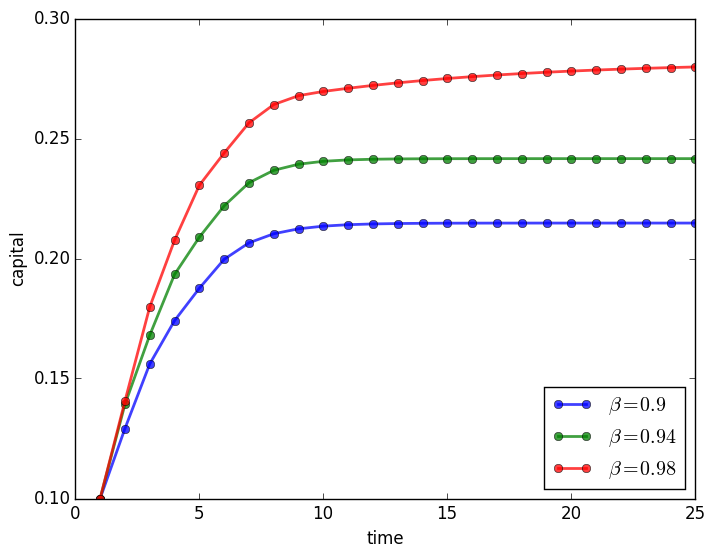

In [4]:
using Grid: CoordInterpGrid, BCnan, InterpLinear

gm = GrowthModel()
w = 5 .* gm.u(gm.grid) .- 25

discount_factors = [0.9, 0.94, 0.98]
series_length = 25

fig, ax = subplots()

ax[:set_xlabel]("time")
ax[:set_ylabel]("capital")

for bet in discount_factors

    # Compute the optimal policy given the discount factor
    gm.bet = bet
    bellman(w) = bellman_operator(gm, w)
    v_star = compute_fixed_point(bellman, w, max_iter=500, verbose=false)
    sigma = get_greedy(gm, v_star)
    
    # Compute the corresponding time series for capital
    k = Array(Float64, series_length)
    k[1] = 0.1
    
    sigma_func = CoordInterpGrid(gm.grid, sigma, BCnan, InterpLinear)
    
    for t=2:series_length
        k[t] = gm.f(k[t-1]) - sigma_func[k[t-1]]
    end
    ax[:plot](1:series_length, k, "o-", lw=2, alpha=0.75, 
              label=LaTeXString("\$\\beta =$(bet)\$"))
    
end

ax[:set_ylim](0.10, 0.30)
ax[:legend](loc="lower right");
    
fig[:show]()